In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df =pd.read_csv('C:/Users/nkova/Lab5/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'num'}>,
        <Axes: >]], dtype=object)

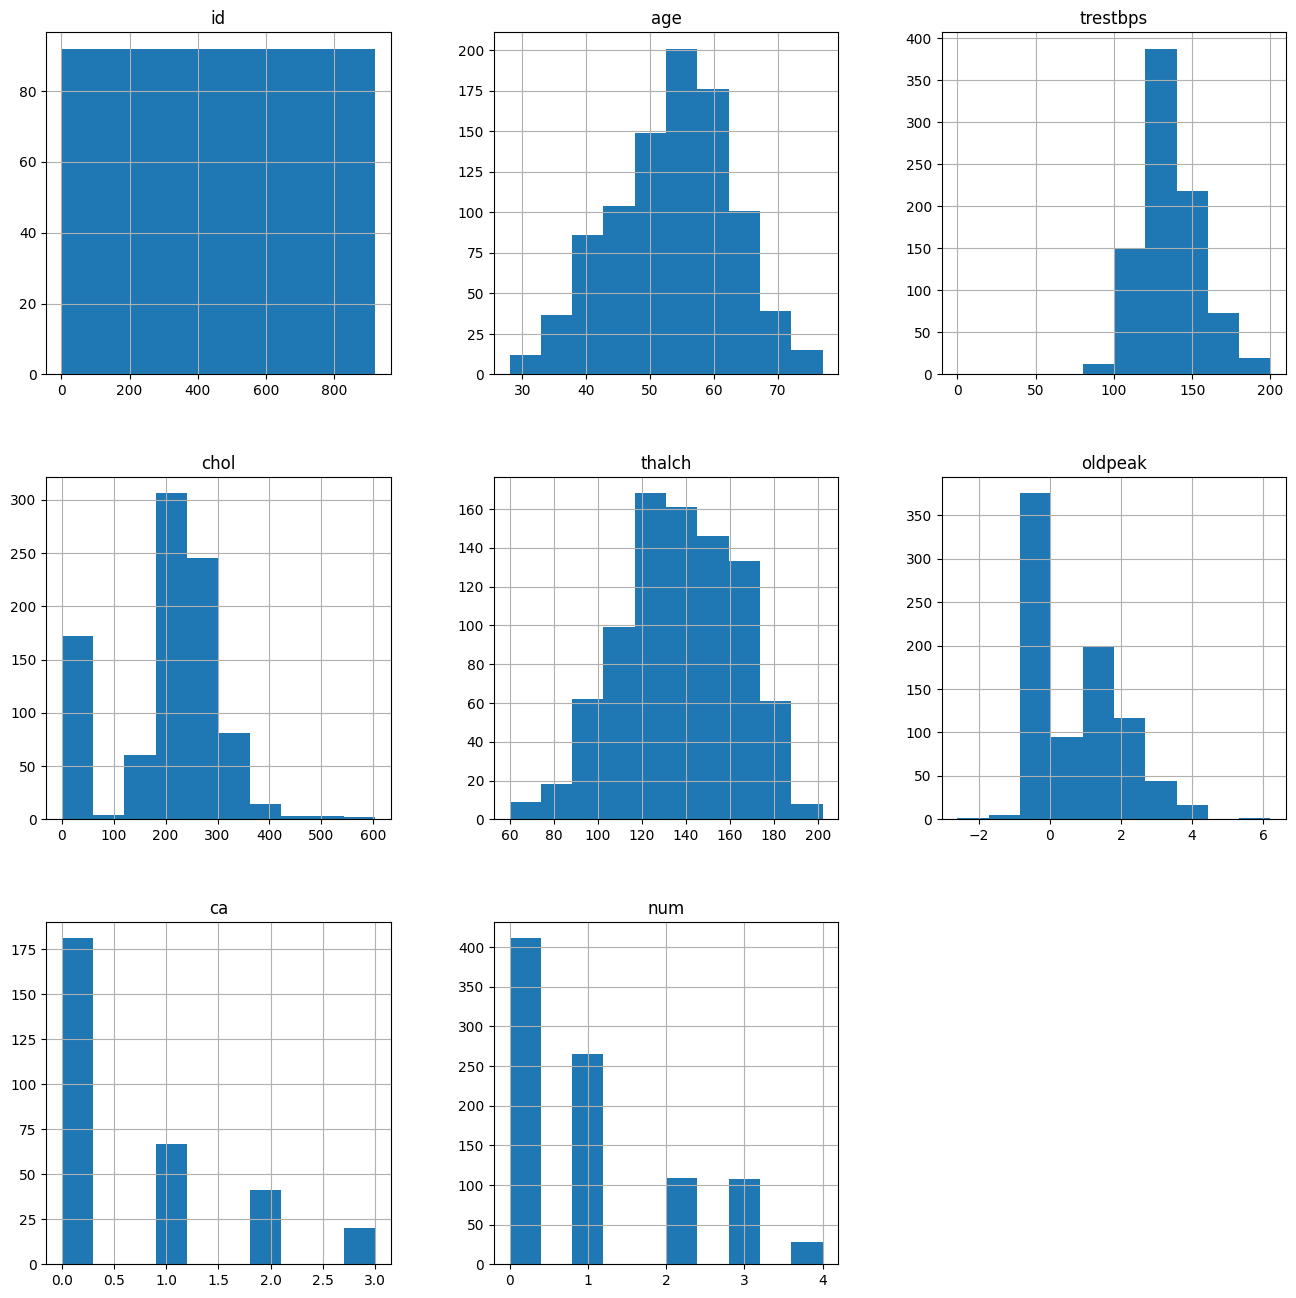

In [49]:
df.hist(figsize=(16, 16))

In [50]:
print("Size of dataset:", df.shape)
duplicate_rows = df.duplicated().sum()
print("\nIs Null")
missing_data = df.isna().sum()
print(missing_data, "\n")

print("\nIs 0")
zero_data = (df == 0).sum()
print(zero_data)

Size of dataset: (920, 16)

Is Null
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64 


Is 0
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol        172
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64


In [51]:

df_cleaned = df.copy()

# Замінити 0 на Null у вказаних колонках
columns_to_replace_zero = ['trestbps', 'chol', 'restecg', 'thalch', 'oldpeak']
for col in columns_to_replace_zero:
    df_cleaned.loc[df_cleaned[col] == 0, col] = pd.NA

# Замінити всі негативні значення на Null в колонці oldpeak
df_cleaned.loc[df_cleaned['oldpeak'] < 0, 'oldpeak'] = pd.NA

In [52]:
def detect_outliers(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    
    anomalies = (data[col] > upper_bound) | (data[col] < lower_bound)
    return anomalies, upper_bound, lower_bound


outlier_results = {}

numeric_columns = df.select_dtypes(include=['number'])

for col in numeric_columns.columns:
    anomalies, upper_bound, lower_bound = detect_outliers(df, col)
    outlier_results[col] = {
        "anomalies": anomalies,
        "upper_bound": upper_bound,
        "lower_bound": lower_bound
    }
    
    
    print(f"Column: {col}")
    print(f"Anomalies: {anomalies.sum()}") 
    print(f"Indices of anomalies: {anomalies[anomalies].index.tolist()}") 
    print()  

Column: id
Anomalies: 0
Indices of anomalies: []

Column: age
Anomalies: 0
Indices of anomalies: []

Column: trestbps
Anomalies: 8
Indices of anomalies: [126, 188, 338, 548, 680, 701, 753, 896]

Column: chol
Anomalies: 2
Indices of anomalies: [152, 546]

Column: thalch
Anomalies: 0
Indices of anomalies: []

Column: oldpeak
Anomalies: 7
Indices of anomalies: [91, 123, 183, 191, 285, 589, 615]

Column: ca
Anomalies: 0
Indices of anomalies: []

Column: num
Anomalies: 0
Indices of anomalies: []



In [53]:
def replace_anomalies(data, col, threshold=3):
    anomalies, _, _ = detect_outliers(data, col, threshold)
    data.loc[anomalies, col] = pd.NA
    return data

for col in numeric_columns.columns:
    df_cleaned = replace_anomalies(df_cleaned, col)



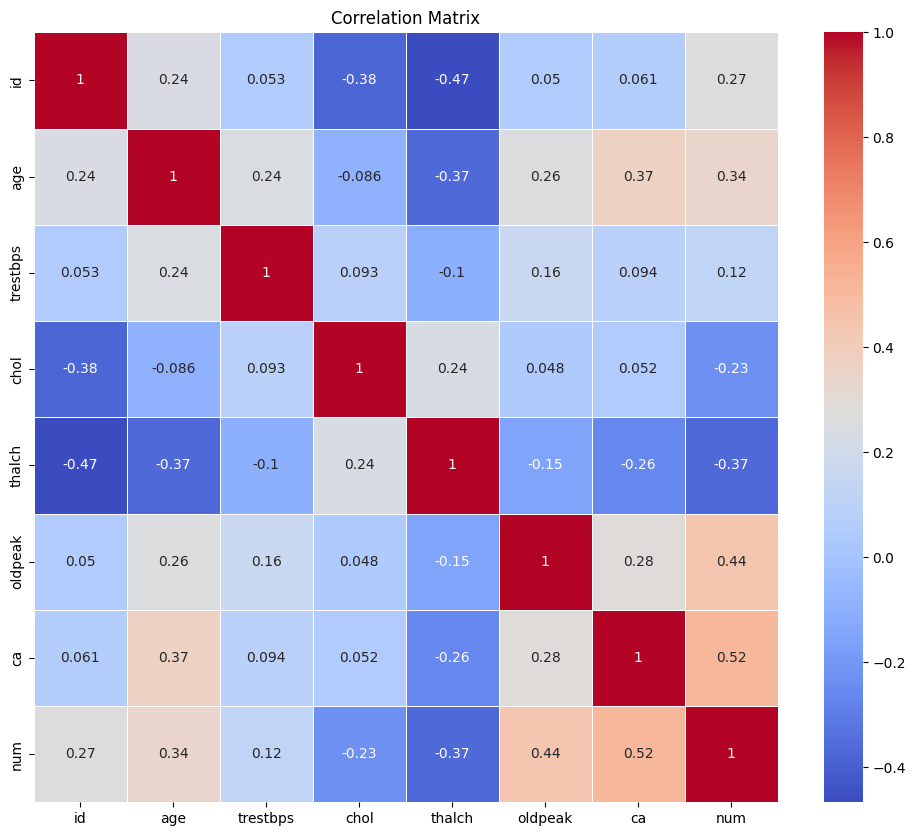

In [54]:
numerical_data = df.select_dtypes(include=['number'])


correlation_matrix = numerical_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


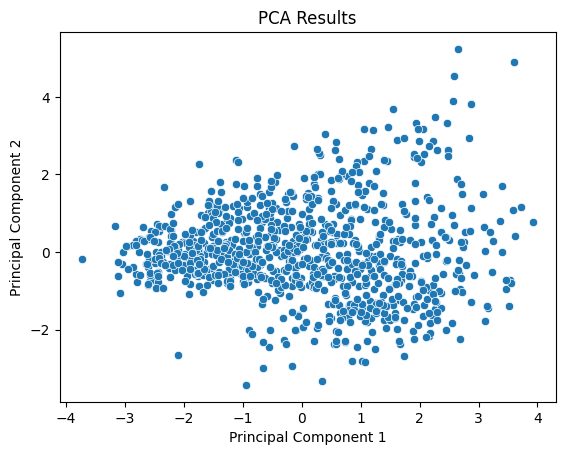

In [55]:
imputer = SimpleImputer(strategy='mean')  
filled_data = imputer.fit_transform(numerical_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_data)

pca = PCA(n_components=2)

pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

sns.scatterplot(x='PC1', y='PC2', data=pca_df)

plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()